In [1]:
import sys
import os
sys.path.append(os.path.abspath('../..'))

from utlis.sync_utlis.sync_df_utlis import process_sync


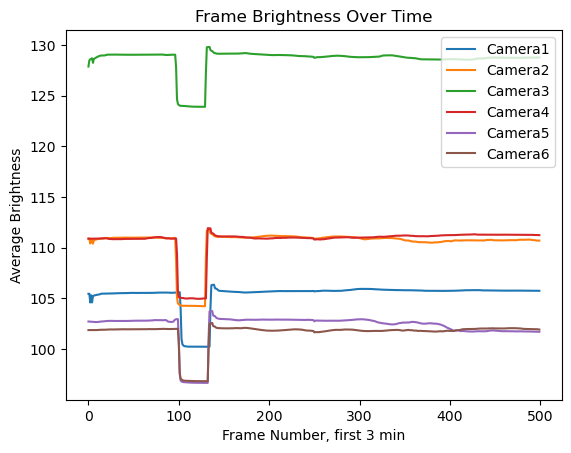

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2: {'Camera1': [103], 'Camera2': [97, 98], 'Camera3': [98], 'Camera4': [99], 'Camera5': [101], 'Camera6': [101]}
Processed drop frames: {'Camera1': 103, 'Camera2': 98, 'Camera3': 98, 'Camera4': 99, 'Camera5': 101, 'Camera6': 101}
98
alined data saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2/df_synced_20240717_PMCr2_z_updated_hires_label3d_dannce.mat
Alignment successful for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2
Moved prior calibration file to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2/prev_calib


True

In [3]:
# base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2'

process_sync(base_folder, threshold=2, max_frames=500)

In [12]:
import glob
import os
from collections import defaultdict

# Define the path where the files are located
folder_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ'

# Use glob to match the pattern
files = glob.glob(f"{folder_path}/*/*/*label3d_dannce.mat")

# Group files by their directory
directory_files = defaultdict(list)
for file in files:
    directory = os.path.dirname(file)
    directory_files[directory].append(file)

# Print directories with multiple files
for directory, files_in_dir in directory_files.items():
    if len(files_in_dir) > 1:
        print(f"Directory '{directory}' has multiple files:")
        for file in files_in_dir:
            print(f"  {file}")
    # else:
        # print(f"{directory} does note have multi files. all good.")

In [2]:
def rough_bundle_sync(base_path, dates, threshold=3, max_frames=500, stepmax_frame = 1000):
    missing_folders = []
    successful_folders = []

    for date in dates:
        date_path = os.path.join(base_path, date)
        if not os.path.exists(date_path):
            print(f"Date folder {date_path} does not exist. Skipping.")
            continue

        calib_file = find_calib_file(date_path)
        print("find calib files", calib_file)
        if not calib_file:
            print(f"No calibration file found in {date_path}. Skipping.")
            continue

        calib_nammm = os.path.basename(calib_file)
        # print(calib_nammm)

        for folder_name in os.listdir(date_path):
            folder_path = os.path.join(date_path, folder_name)

            if os.path.isdir(folder_path) and folder_name[0].isdigit():
                save_path = os.path.join(folder_path, f'df_synced_{folder_name}_{calib_nammm}') #f'pos_synced_{folder_name}_{calib_nammm}'
                vi_path = os.path.join(folder_path, 'videos')

                drop_frames = process_videos(vi_path, threshold, max_frames)
                print(f"Detected intensity drop frames in {folder_name}:", drop_frames)

                if any(len(frames) == 0 for frames in drop_frames.values()):
                    missing_folders.append(folder_path)
                    print(f"Skipping process_calibration_data for {folder_name} due to missing drop frames")
                else:
                    successful_folders.append(folder_path)
                    align_frames(calib_file, drop_frames, save_path)
                    # update_calib(calib_file, drop_frames, save_path)
                    # print('h')

    print('Missing folders:', missing_folders)
    return missing_folders, successful_folders

In [ ]:
# also adding the exe generation for mir_generate param, for future references:
import sys
import os
sys.path.append(os.path.abspath('../..'))

from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z

# base_path = 'G:/Videos/6cam/lq53/2024_09_16_test_chris_new/'
# calib_path = os.path.join(base_path, 'calib_before_3/chris_new/')
# vid_path = 'rec_test_1'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

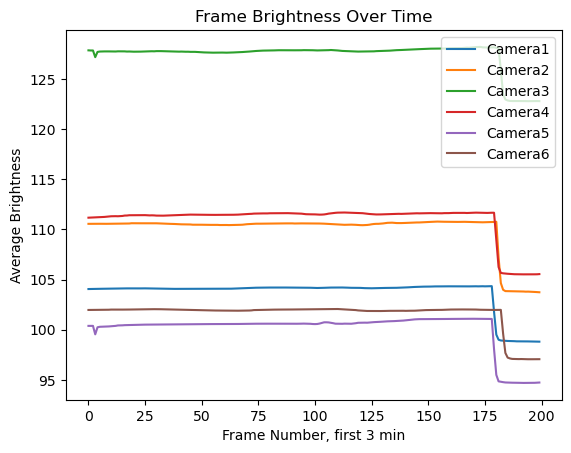

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240717_PMCr1: {'Camera1': [179, 180], 'Camera2': [181, 182], 'Camera3': [182, 183], 'Camera4': [180, 181], 'Camera5': [179, 180], 'Camera6': [183]}
Processed drop frames: {'Camera1': 180, 'Camera2': 182, 'Camera3': 183, 'Camera4': 181, 'Camera5': 180, 'Camera6': 183}
180
1
> /hpc/group/tdunn/lq53/BBOP/utlis/sync_utlis/sync_df_utlis.py(146)align_frames()
    144         pdb.set_trace()
    145 
--> 146         print(sync[cam_idx][0][keyyyyy])
    147         data_frame = sync[cam_idx][0][keyyyyy][0][0][0]
    148         print(2)

[]
Error during alignment: index 0 is out of bounds for axis 0 with size 0


False

In [2]:
# base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/20240707-PMC-r1'

process_sync(base_folder, threshold=2, max_frames=200)

In [4]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29'
# calib_path = os.path.join(base_path, 'z_updated_hires')
# vid_path = '20240717_PMCr2'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27900
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2/z_updated_hires_label3d_dannce.mat


True

In [7]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26'
# calib_path = os.path.join(base_path, 'z_updated_hires')
# vid_path = '20240730_PMCr2'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27900
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240730_PMCr2/z_updated_hires_label3d_dannce.mat


True

In [2]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18'
# calib_path = os.path.join(base_path, 'calib_before_13_17')
# vid_path = '20240707-PMC-r1'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27300
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/20240707-PMC-r1/calib_before_13_17_label3d_dannce.mat


True